# Convexity Revisited

In [1]:
# This code cell installs packages on Colab

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.easy_install()
else:
    sys.path.insert(0, '../')
    import helper
helper.set_plotting_style()

In [2]:
import pandas as pd
import pyomo.environ as pyo

## Background

**Reference**: Beginning of Chapter 4 in Biegler (2010)

### Canonical Nonlinear Program (NLP)

\begin{align*}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) & \text{(objective function)} \\
\text{s.t.} \quad & g_i(\mathbf{x}) \leq 0, & i = 1, \dots, m \quad \text{(inequality constraints)} \\
& h_j(\mathbf{x}) = 0, & j = 1, \dots, p \quad \text{(equality constraints)} \\
& \mathbf{x} \in \mathbb{R}^n & \text{(decision variables)}
\end{align*}

Assumption: functions $f(\mathbf{x}) : \mathbb{R}^n \to \mathbb{R}$, $\mathbf{h}(\mathbf{x}) : \mathbb{R}^n \to \mathbb{R}^m$, and $\mathbf{g}(\mathbf{x}) : \mathbb{R}^n \to \mathbb{R}^r$ have **continuous first and second derivatives**.

Denote the **feasible region** as:

$$
\mathcal{F} = \{ \mathbf{x} \,|\, \mathbf{g}(\mathbf{x}) \leq 0, \mathbf{h}(\mathbf{x}) = 0 \}.
$$


### Types of Constrained Optimal Solutions

Definition 4.1: Constrained Optimal Solutions

A point $x^*$ is a **global minimizer** if $f(x^*) \leq f(x)$ for all $x \in \mathcal{F}$.

A point $x^*$ is a **local minimizer** if $f(x^*) \leq f(x)$ for all $x \in \mathcal{N}(x^*) \cap \mathcal{F}$, where we define 
  $$
  \mathcal{N}(x^*) = \{x : \|x - x^*\| < \epsilon\}, \quad \epsilon > 0.
  $$

A point $x^*$ is a **strict local minimizer** if $f(x^*) < f(x)$ for all $x \in \mathcal{N}(x^*) \cap \mathcal{F}$.

A point $x^*$ is an **isolated local minimizer** if there are no other local minimizers in $\mathcal{N}(x^*) \cap \mathcal{F}$.


### Key Questions

As with unconstrained optimization, the following questions need to be considered:

- If a solution $x^*$ exists, is it a global solution in $\mathcal{F}$ or is it only a local solution?

- What conditions characterize the optimal solutions?

- Are there special problem classes of the NLP whose solutions have stronger properties and are easier to solve?

- Are there efficient and reliable methods to solve the NLP?

## Convexity for Constrained Optimization

**Reference**: Section 4.1 in Biegler (2010)


### Illustrative Examples

Main idea: are the objective function and feasible region both convex?


$f(x)$ is **convex** on the domain $x \in X$ if and only if  
$$
\alpha f(x^a) + (1 - \alpha)f(x^b) \geq f(\alpha x^a + (1 - \alpha)x^b) \quad \forall x^a, x^b \in X, \, \alpha \in (0, 1).
$$

**Strict convexity** requires the inequality to be strict.

![concept_test_1](https://raw.githubusercontent.com/ndcbe/optimization/main/media/convex_concept1.png)

The region $\mathcal{Y}$ is **convex** if and only if  
$$
\alpha x^a + (1 - \alpha)x^b \in \mathcal{Y} \quad \forall x^a, x^b \in \mathcal{Y}, \, \alpha \in [0, 1].
$$

![concept_test_2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/convex_concept2.png)




### Theorem 4.2: Convexity

**Theorem 4.2**  If $g(x)$ is convex and $h(x)$ is linear, then the region  

$$
\mathcal{F} = \{ x \,|\, g(x) \leq 0, h(x) = 0 \}
$$  

is convex, i.e.,  

$$
\alpha x^a + (1 - \alpha)x^b \in \mathcal{F} \quad \text{for all } \alpha \in (0, 1) \text{ and } x^a, x^b \in \mathcal{F}.
$$

**Proof** 

1. **Consider two points** $x^a, x^b \in \mathcal{F}$ and  
   
   $$
   \bar{x} = \alpha x^a + (1 - \alpha)x^b \quad \text{for some } \alpha \in (0, 1).
   $$

2. **If** $\bar{x} \not\in \mathcal{F}$, **then** (i) $g(\bar{x}) > 0$ or (ii) $h(\bar{x}) \neq 0$ or both.

   - **Case (i):** Recall $g(x)$ is convex, and $g(x^a) \leq 0$ and $g(x^b) \leq 0$ (both $x^a$ and $x^b$ are feasible).  
     $$
     0 \geq \alpha g(x^a) + (1 - \alpha)g(x^b) \geq g(\alpha x^a + (1 - \alpha)x^b) = g(\bar{x}) \quad \text{(definition of convexity)}.
     $$  
     Thus, $g(\bar{x}) \leq 0$.

   - **Case (ii):** Recall $h(x)$ is linear, and $h(x^a) = 0$ and $h(x^b) = 0$.  
     \begin{align*}
     0 & = \alpha h(x^a) + (1 - \alpha)h(x^b) \quad \text{(property of linear functions)} \\
     & = h(\alpha x^a + (1 - \alpha)x^b) = h(\bar{x}) \quad \text{(definition of } \bar{x} \text{)}.
     \end{align*}
     Thus, $g(\bar{x}) \leq 0$ and $h(\bar{x}) = 0$.  

This leads to a **contradiction.**


### Theorem 4.3: Global Minimizers

**Theorem 4.3**  If $f(x)$ is convex and $\mathcal{F}$ is convex, then every local minimum in $\mathcal{F}$ is a global minimum. If $f(x)$ is strictly convex in $\mathcal{F}$, then a local minimum is the unique global minimum.

**Proof: Convexity Claim**

1. **Assumption:** There are two local minima $x^a, x^b \in \mathcal{F}$ with $f(x^a) > f(x^b)$. Seek contradiction.

2. **Definition of Local Minimum:**  
   - $f(x^a) \leq f(x), \, x \in \mathcal{N}(x^a) \cap \mathcal{F}$  
   - $f(x^b) \leq f(x), \, x \in \mathcal{N}(x^b) \cap \mathcal{F}$  

3. **By Convexity:**  
   - $(1 - \alpha)x^a + \alpha x^b \in \mathcal{F}$  
   - $f((1 - \alpha)x^a + \alpha x^b) \leq (1 - \alpha)f(x^a) + \alpha f(x^b), \, \forall \alpha \in (0, 1)$  

4. **Choose $\alpha$ such that:**

   $$
   \bar{x} = (1 - \alpha)x^a + \alpha x^b \in \mathcal{N}(x^a) \cap \mathcal{F}.
   $$

   Thus,  
   $$
   f(\bar{x}) \leq f(x^a) + \alpha (f(x^b) - f(x^a)).
   $$  
   
   Recall $f(x^b) < f(x^a)$, so  
   
   $$
   f(\bar{x}) < f(x^a).
   $$  
   
   This is a contradiction, as $x^a$ cannot be a local minimizer.

**Proof: Stricty Convexity Claim**. Same idea as above. Assume $f(x^a) \geq f(x^b)$ in (1). Use strict inequality (from the strict convexity definition) in (3) and (4).


### More Illustrative Examples

![concept_test3](https://raw.githubusercontent.com/ndcbe/optimization/main/media/convex_concept3.png)

## Circle Packing Example

**Reference**: Section 4.1 in Biegler (2010)

**Motivating Question**: Is this problem convex?

What is the smallest rectangle you can use to enclose three given circles? Reference: Example 4.4 in Biegler (2010).

![picture](https://raw.githubusercontent.com/ndcbe/optimization/main/media/pack1.png)

### Optimization Model and Pyomo Implementation

The following optimization model is given in Biegler (2010) and [adapted to use set notation](../1/NP.ipynb).

\begin{align*}
\min_{x,y,A,B} \quad & 2(A + B) \\
\text{s.t.} \quad & A \geq 0, \quad B \geq 0 \\
& x_i, y_i, \geq R_i, \quad x_i \leq B - R_i, \quad y_i \leq A - R_i, \quad \forall i \in \mathcal{C} \\
& (x_i - x_j)^2 + (y_i - y_j)^2 \geq (R_i + R_j)^2, \quad \forall i,j \in \{i \in \mathcal{C}, j \in \mathcal{C}: i < j\}
\end{align*}

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_circle_model(circle_radii):
    ''' Create circle optimization model in Pyomo
    
    Arguments:
        circle_radii: dictionary with keys=circle name and value=radius (float)
        
    Returns:
        model: Pyomo model
    '''

    # Number of circles to consider
    n = len(circle_radii)

    # Create a concrete Pyomo model.
    model = pyo.ConcreteModel()

    # Initialize index for circles
    model.CIRCLES = pyo.Set(initialize = circle_radii.keys())
    
    # Create parameter
    model.R = pyo.Param(model.CIRCLES, domain=pyo.PositiveReals, initialize=circle_radii)

    # Create variables for box
    model.a = pyo.Var(domain=pyo.PositiveReals)
    model.b = pyo.Var(domain=pyo.PositiveReals)

    # Set objective
    model.obj = pyo.Objective(expr=2*(model.a + model.b), sense = pyo.minimize)

    # Create variables for circle centers
    model.x = pyo.Var(model.CIRCLES, domain=pyo.PositiveReals)
    model.y = pyo.Var(model.CIRCLES, domain=pyo.PositiveReals)

    # "In the box" constraints
    def left_x(m,c):
        return m.x[c] >= model.R[c]
    model.left_x_con = pyo.Constraint(model.CIRCLES, rule=left_x)

    def left_y(m,c):
        return m.y[c] >= model.R[c]
    model.left_y_con = pyo.Constraint(model.CIRCLES, rule=left_y)

    def right_x(m,c):
        return m.x[c] <= m.b - model.R[c]
    model.right_x_con = pyo.Constraint(model.CIRCLES, rule=right_x)

    def right_y(m,c):
        return m.y[c] <= m.a - model.R[c]
    model.right_y_con = pyo.Constraint(model.CIRCLES, rule=right_y)

    # No overlap constraints
    def no_overlap(m,c1,c2):
        if c1 < c2:
            return (m.x[c1] - m.x[c2])**2 + (m.y[c1] - m.y[c2])**2 >= (model.R[c1] + model.R[c2])**2
        else:
            return pyo.Constraint.Skip
    model.no_overlap_con = pyo.Constraint(model.CIRCLES, model.CIRCLES, rule=no_overlap)
    
    return model

def initialize_circle_model(model, a_init=25, b_init=25):
    ''' Initialize the x and y coordinates using uniform distribution
    
    Arguments:
        a_init: initial value for a (default=25)
        b_init: initial value for b (default=25)
        
    Returns:
        Nothing. But per Pyomo scoping rules, the input argument `model`
        can be modified in this function.
    
    '''
    # Initialize 
    model.a = 25
    model.b = 25

    for i in model.CIRCLES:
        # Adding circle radii ensures the remains in the >0, >0 quadrant
        model.x[i] = random.uniform(0,10) + model.R[i]
        model.y[i] = random.uniform(0,10) + model.R[i]



Next, we will create a dictionary containing the circle names and radii values.

In [4]:
# Create dictionary with circle data
circle_data = {'A':10.0, 'B':5.0, 'C':3.0}
circle_data

{'A': 10.0, 'B': 5.0, 'C': 3.0}

In [5]:
# Access the keys
circle_data.keys()

dict_keys(['A', 'B', 'C'])

Now let's create the model.

In [6]:
# Create model
model = create_circle_model(circle_data)

And let's initialize the model.

In [7]:
# Initialize model
initialize_circle_model(model)
model.pprint()

1 Set Declarations
    CIRCLES : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'A', 'B', 'C'}

1 Param Declarations
    R : Size=3, Index=CIRCLES, Domain=PositiveReals, Default=None, Mutable=False
        Key : Value
          A :  10.0
          B :   5.0
          C :   3.0

4 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    25 :  None : False : False : PositiveReals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    25 :  None : False : False : PositiveReals
    x : Size=3, Index=CIRCLES
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          A :     0 : 11.513225996655489 :  None : False : False : PositiveReals
          B :     0 :   8.43454062603906 :  None : False : False : PositiveReals
          C :     0 :  4.040445303542623 :

### Visualize Initial Point

Next, we'll define a function to plot the solution (or initial point)

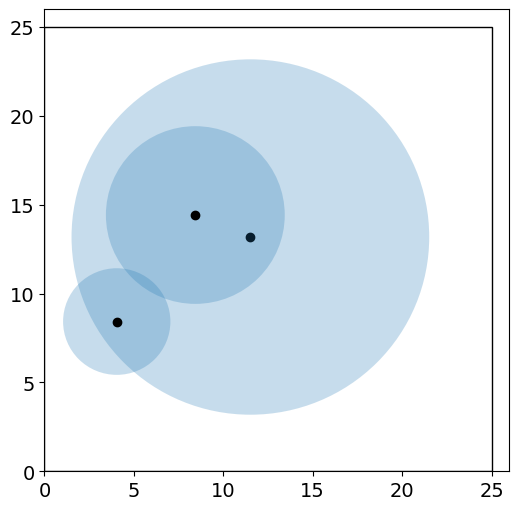

In [8]:
# Plot initial point

def plot_circles(m):
    ''' Plot circles using data in Pyomo model
    
    Arguments:
        m: Pyomo concrete model
    
    Returns:
        Nothing (but makes a figure)
    
    '''
    
    # Create figure
    fig, ax = plt.subplots(1,figsize=(6,6))
    
    # Adjust axes
    l = max(m.a.value,m.b.value) + 1
    ax.set_xlim(0,l)
    ax.set_ylim(0,l)
    
    # Draw box
    art = mpatches.Rectangle((0,0), width=m.b.value, height=m.a.value,fill=False)
    ax.add_patch(art)

    # Draw circles and mark center
    for i in m.CIRCLES:
        art2 = mpatches.Circle( (m.x[i].value,m.y[i].value), radius=m.R[i],fill=True,alpha=0.25)
        ax.add_patch(art2)
        
        plt.scatter(m.x[i].value,m.y[i].value,color='black')
    
    # Show plot
    plt.show()
    
plot_circles(model)

### Solve and Inspect the Solution

In [9]:
# Specify the solver
solver = pyo.SolverFactory('ipopt')

# Solve the model
results = solver.solve(model, tee = True)

Ipopt 3.14.16: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        8
                     variables with only lower bounds:        8
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number

Next, we can inspect the solution. Because Pyomo is a Python extension, we can use Pyoth (for loops, etc.) to programmatically inspect the solution.

Name	Value
a 	 19.999999803189517
b 	 29.142135416184765
x[A] 	 19.14213551493193
x[B] 	 4.999999951252107
x[C] 	 5.397289325741121
y[A] 	 9.999999901252016
y[B] 	 14.999999849644135
y[C] 	 4.723178462635149


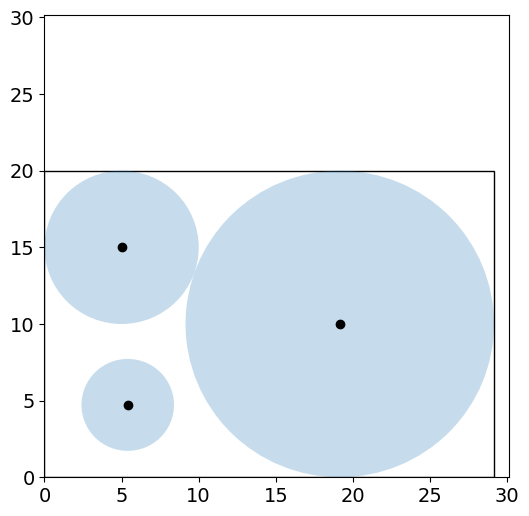

In [10]:
# Print variable values
print("Name\tValue")
for c in model.component_data_objects(pyo.Var):
    print(c.name,"\t", pyo.value(c))

# Plot solution
plot_circles(model)

In [11]:
# Print constraints
for c in model.component_data_objects(pyo.Constraint):
    print(c.name,"\t", pyo.value(c.lower),"\t", pyo.value(c.body),"\t", pyo.value(c.upper))

left_x_con[A] 	 10.0 	 19.14213551493193 	 None
left_x_con[B] 	 5.0 	 4.999999951252107 	 None
left_x_con[C] 	 3.0 	 5.397289325741121 	 None
left_y_con[A] 	 10.0 	 9.999999901252016 	 None
left_y_con[B] 	 5.0 	 14.999999849644135 	 None
left_y_con[C] 	 3.0 	 4.723178462635149 	 None
right_x_con[A] 	 None 	 9.874716511149018e-08 	 0.0
right_x_con[B] 	 None 	 -19.142135464932657 	 0.0
right_x_con[C] 	 None 	 -20.744846090443644 	 0.0
right_y_con[A] 	 None 	 9.806249856580962e-08 	 0.0
right_y_con[B] 	 None 	 4.6454617930180575e-08 	 0.0
right_y_con[C] 	 None 	 -12.276821340554369 	 0.0
no_overlap_con[A,B] 	 225.0 	 224.9999977854188 	 None
no_overlap_con[A,C] 	 169.0 	 216.7656412595597 	 None
no_overlap_con[B,C] 	 64.0 	 105.77089666756719 	 None


### Reinitialize and Resolve

Reinitialize the model, plot the initial point, resolve, and plot the solution. Is there more than one solution?

In [12]:
# Initialize and print the model
initialize_circle_model(model)

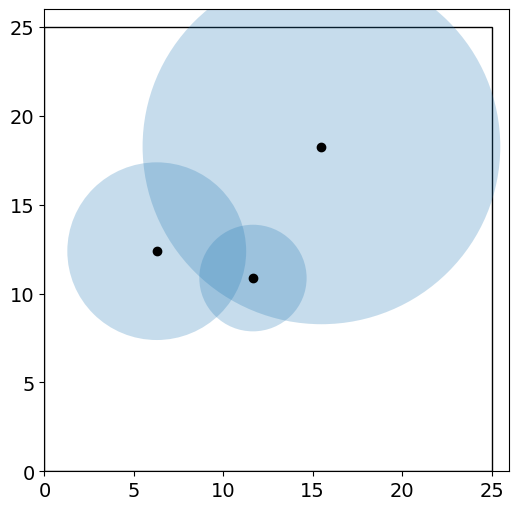

In [13]:
# Plot initial point
plot_circles(model)

In [14]:
# Solve the model
results = solver.solve(model, tee = True)

Ipopt 3.14.16: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        8
                     variables with only lower bounds:        8
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number

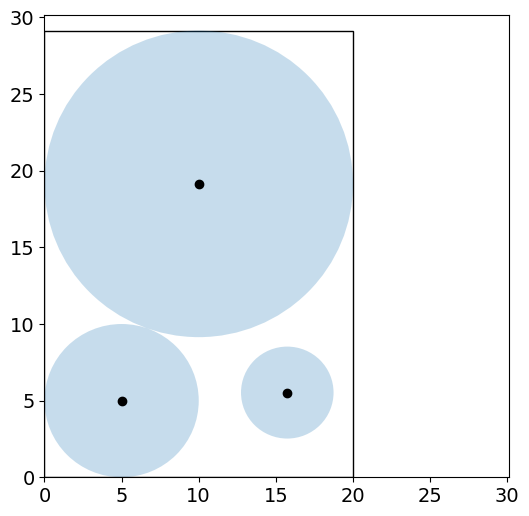

In [15]:
# Plot solution
plot_circles(model)

## Take Away Messages
* Nonlinear programs may be nonconvex. For nonconvex problems, there often exists many local optima that are not also global optima.
* Initialization is really important in optimization problems with nonlinear objectives or constraints!